# Objective
* To classify MNIST digits using naive Bayes classifier in scikit-learn

Scikit-learn has a nice uitility function to download datasets from mldata.org repo. We will use it to download MNIST dataset

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

**fetch_mldata** function returns a dictionary, with keys "COL_NAMES", "DESCR", "data" and "target"

In [2]:
print("Column names = ", mnist.COL_NAMES)
print("DESC = ", mnist.DESCR)
print("Shape of data = ", mnist["data"].shape)
print("Shape of target = ", mnist["target"].shape)

Column names =  ['label', 'data']
DESC =  mldata.org dataset: mnist-original
Shape of data =  (70000, 784)
Shape of target =  (70000,)


We see that we have 70,000 samples of data. Each sample is a image of size 28*28 pixels which is flattened to a 1D array of size 784.

## Plot some sample data

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

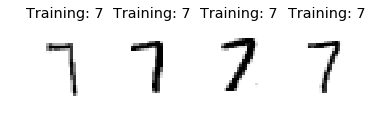

In [4]:
images_and_labels = list(zip(mnist.data, mnist.target))
for index, (image, label) in enumerate(images_and_labels[44790:44794]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# Prepare dataset

Each sample in data in a vector of size 784. The values of the vector range from 0 to 255. We need to normalize the values so that it ranges from 0 to 1. Normalization is done so that the learning algorithm converges faster.

In [5]:
X = mnist.data
print("Minimum and maximun value of pixels in first sample before normalization = ", np.min(X[0]), np.max(X[0]))

X = X / 255.0
print("Minimum and maximun value of pixels in first sample after normalization = ", np.min(X[0]), np.max(X[0]))

Minimum and maximun value of pixels in first sample before normalization =  0 255
Minimum and maximun value of pixels in first sample after normalization =  0.0 1.0


In [15]:
Y = mnist.target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print("Total training samples = ", X_train.shape[0])
print("Total testing samples = ", X_test.shape[0])

Total training samples =  49000
Total testing samples =  21000


# Model training and validation

We will use a simple Multinomial model. Even the default setting will gives us 82% accuracy. The precision and recall are also fairly good.

Deep neural nets can achieve more than 99% accuracy for this dataset but for a simple model like this that trains under a second, the score is not too bad.

In [17]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
predicted = classifier.predict(X_test)

print("Accuracy of model = %2f%%" % (accuracy_score(Y_test, predicted)*100))
print(classification_report(Y_test, predicted))

Accuracy of model = 82.647619%
             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91      2101
        1.0       0.89      0.93      0.91      2324
        2.0       0.89      0.83      0.86      2142
        3.0       0.80      0.80      0.80      2168
        4.0       0.85      0.73      0.79      2062
        5.0       0.85      0.68      0.75      1888
        6.0       0.87      0.91      0.89      2020
        7.0       0.95      0.83      0.88      2199
        8.0       0.65      0.78      0.71      2043
        9.0       0.68      0.85      0.75      2053

avg / total       0.84      0.83      0.83     21000



Prediction


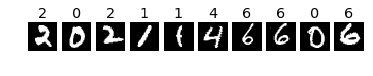

In [19]:
print("Prediction")
num_visualize = 10
images_and_predictions = list(zip(X_test, predicted))
for i, (im, prediction) in enumerate(images_and_predictions[:num_visualize]):
    plt.subplot(1, num_visualize, i + 1)
    plt.axis("off")
    plt.imshow(im.reshape(28, 28), cmap=plt.cm.gray, interpolation="nearest")
    plt.title("%i" % prediction)